In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
original_data = pd.read_csv('/home/pc480/WESAD/S2/filtered_data.csv')
cleaned_data = pd.read_csv('./S2/IQR.csv')
og=original_data['BVP']
cl=cleaned_data['BVP']
data=pd.DataFrame({'orginal':og,'cleaned':cl})

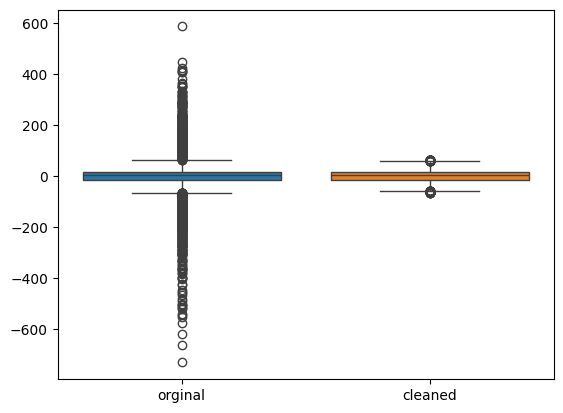

In [8]:
plt.Figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

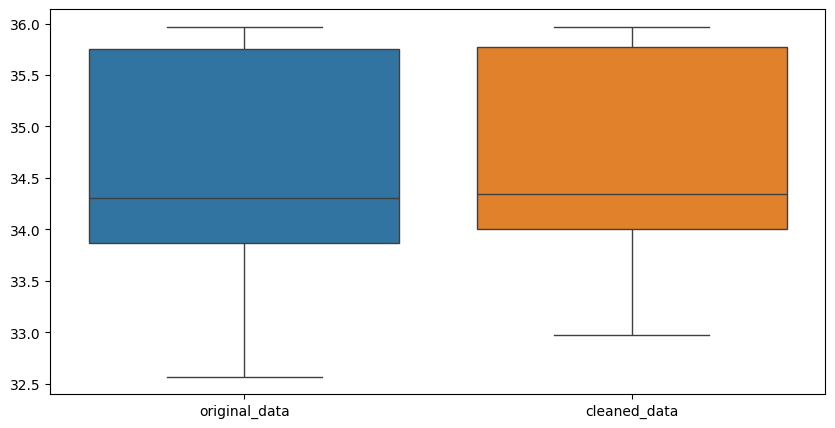

In [10]:
tog=original_data['TEMP']
tcl=cleaned_data['TEMP']
d2=pd.DataFrame({'original_data':tog,'cleaned_data':tcl})
plt.figure(figsize=(10,5))
sns.boxplot(data=d2)
plt.show()

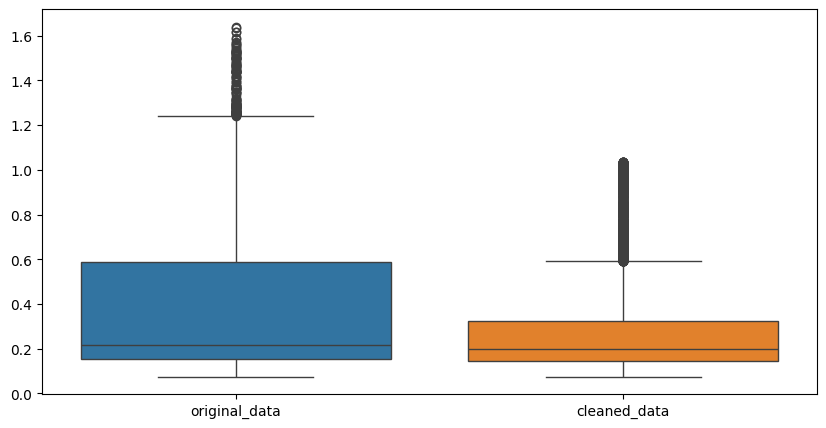

In [12]:
hog=original_data['EDA']
hcl=cleaned_data['EDA']
d3=pd.DataFrame({'original_data':hog,'cleaned_data':hcl})
plt.figure(figsize=(10,5))
sns.boxplot(data=d3)
plt.show()

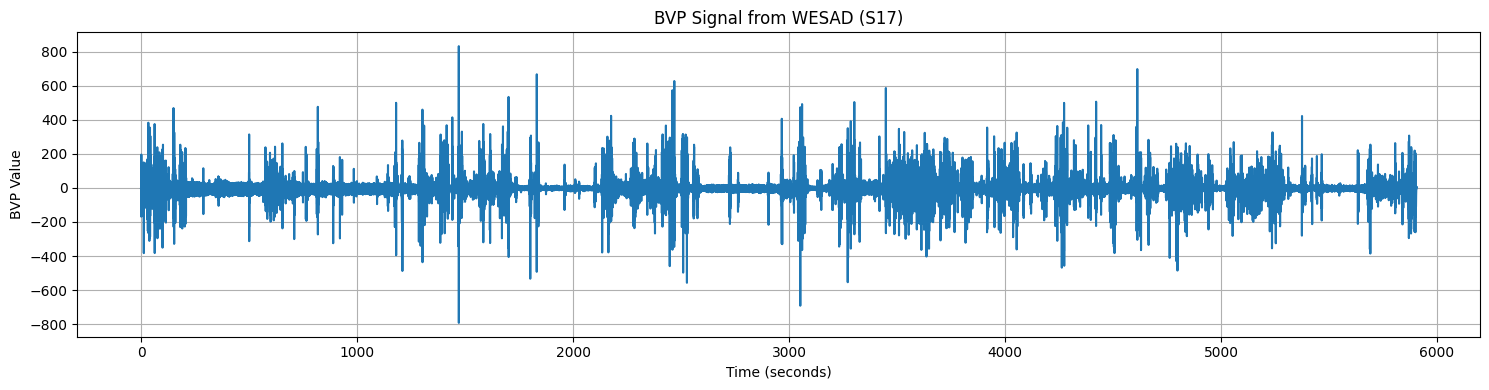

In [22]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load WESAD data
pkl_file = './S17/S17.pkl'  
with open(pkl_file, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

# Extract and flatten BVP signal
bvp = np.array(data['signal']['wrist']['BVP']).flatten()

# Sampling rate and duration
sampling_rate = 64  # Hz
duration = 5904  # seconds (378880 / 64 = 5904)
samples_to_plot = sampling_rate * duration  # = 378,880

# Create time axis
time_axis = np.arange(len(bvp)) / sampling_rate  # in seconds

# Plot
plt.figure(figsize=(15, 4))
plt.plot(time_axis[:samples_to_plot], bvp[:samples_to_plot])
plt.title("BVP Signal from WESAD (S17)")
plt.xlabel("Time (seconds)")
plt.ylabel("BVP Value")
plt.grid(True)
plt.tight_layout()
plt.show()


     BVP       EDA   TEMP  Label
0  -0.49  2.015176  33.39      0
1 -23.20  2.012617  33.37      0
2  10.48  2.001103  33.37      0
3  -0.09  2.030529  33.37      0
4 -55.02  1.979353  33.37      0


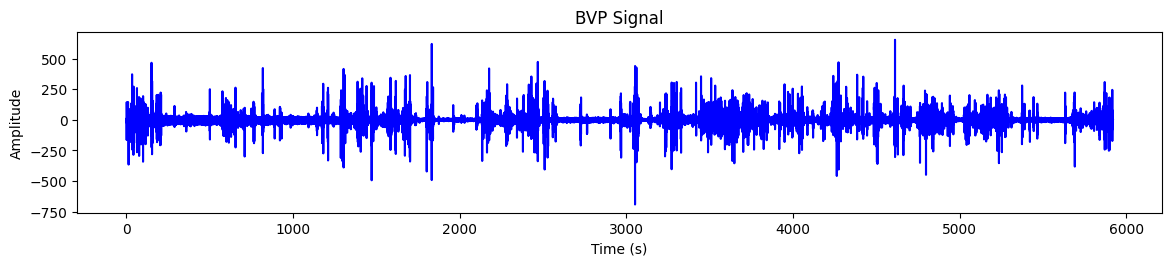

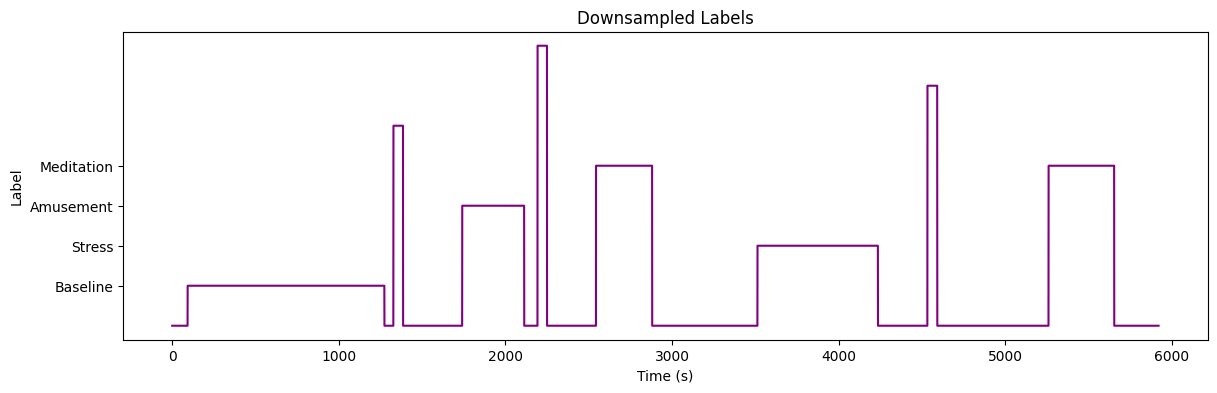

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV file
combined_df = pd.read_csv('combined_wesad_4Hz.csv')

# Check the first few rows to verify the structure
print(combined_df.head())

# Extract columns for plotting
bvp_downsampled = combined_df['BVP']
eda = combined_df['EDA']
temp = combined_df['TEMP']
labels = combined_df['Label']

# Create a time axis for plotting (since the data is downsampled to 4Hz)
time_axis = combined_df.index / 4  # This gives time in seconds assuming downsampling to 4Hz

# Plot BVP, EDA, and TEMP against time
plt.figure(figsize=(14, 8))

# BVP plot
plt.subplot(3, 1, 1)
plt.plot(time_axis, bvp_downsampled, label='BVP (Downsampled to 4Hz)', color='blue')
plt.title('BVP Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')



# Plot the downsampled labels
plt.figure(figsize=(14, 4))
plt.plot(time_axis, labels, label='Downsampled Labels (4Hz)', color='purple')
plt.title('Downsampled Labels')
plt.xlabel('Time (s)')
plt.ylabel('Label')
plt.yticks([1, 2, 3, 4], ['Baseline', 'Stress', 'Amusement', 'Meditation'])
plt.show()


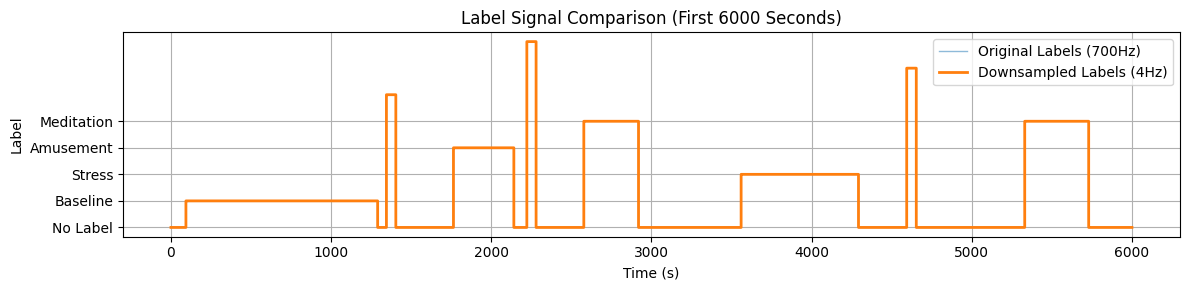

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `labels` is your original 700 Hz label array from the .pkl
# Downsampled by factor 175 (700/4 = 175)

window_sec = 6000 # visualize first 10 seconds
original_label_segment = labels[:700 * window_sec]
downsampled_label_segment = labels[::175][:4 * window_sec]

time_original = np.linspace(0, window_sec, len(original_label_segment))
time_downsampled = np.linspace(0, window_sec, len(downsampled_label_segment))

plt.figure(figsize=(12, 3))
plt.step(time_original, original_label_segment, label='Original Labels (700Hz)', where='post', alpha=0.5, linewidth=1)
plt.step(time_downsampled, downsampled_label_segment, label='Downsampled Labels (4Hz)', where='post', linewidth=2)
plt.yticks([0, 1, 2, 3, 4], ['No Label', 'Baseline', 'Stress', 'Amusement','Meditation'])  # modify if your labels are different
plt.title(f'Label Signal Comparison (First {window_sec} Seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
